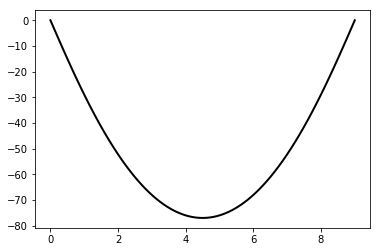

In [31]:
import numpy as np
import math
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# y'' +4y = -9sin(x), y(0) = 1., y(3*pi/4.) = -(1.+3*sqrt(2))/2., y'(0) = -2 
# Exact Solution: y(x) = cos(2x) + (1/2)sin(2x) - 3sin(x)

def find_t(f,a,b,alpha,beta,t0,t1,maxI): 
    sol1 = 1
    i=0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0] 
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0] 
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print ("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], 2*y[0]+8*x*(9-x)]) 
#4*x**2-36*x+4*math.exp(sqrt(-2)*x)+4
#-4*y[0]-9*np.sin(x)])

X = np.linspace(0,9,100)
Y = solveSecant(ode,X,0,9,0,0,-1,1,40)

plt.plot(X,Y,'-k',linewidth=2) 
plt.show()